# DECISION TREE REGRESSION (on Position_Salary.csv)

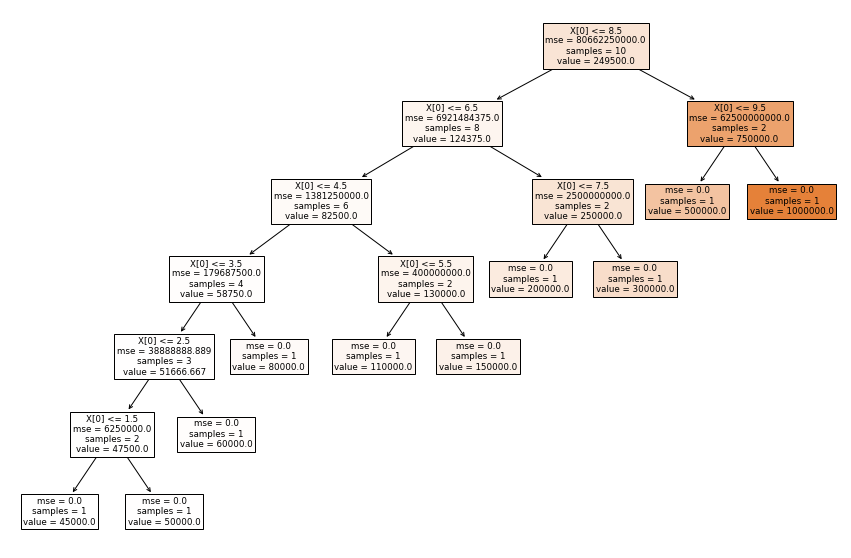

Enter position : 6.5
Predicted result =  [150000.]
Mean square error =  548923.1883120503
Accuracy = 100.0%


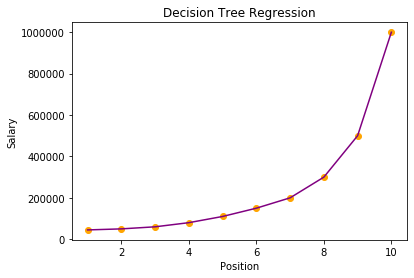

In [13]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import math

#Reading data
dataset = pd.read_csv("E:\\MLPython\\Position_Salaries.csv")

#Retrieving x and y columns using column indices
x = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

#Reshaping dataset as Machine can understand array, not dataset
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)

#Splitting data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

#Feature scaling of data
from sklearn.preprocessing import StandardScaler
SS_X = StandardScaler()
x_train = SS_X.fit_transform(x_train)
x_test =SS_X.transform(x_test)
SS_Y = StandardScaler()
y_train = SS_Y.fit_transform(y_train)

#Train the model
MODEL_DTR = DecisionTreeRegressor(random_state = 0)
MODEL_DTR.fit(x, y)

#Visualize tree
from sklearn import tree
plt.figure(figsize = (15,10))
tree.plot_tree(MODEL_DTR, filled = True)
plt.show()

#Prediction from model
position = float(input("Enter position : "))
y_pred = MODEL_DTR.predict([[position]])
print("Predicted result = ", y_pred)

#Finding Accuracy and mean squared error
MSE = mean_squared_error(y_test, MODEL_DTR.predict(x_test))
print("Mean square error = ", math.sqrt(MSE))
print("Accuracy = " + str((MODEL_DTR.score(x, y)) * 100) + "%")

#Regression Visualization
plt.scatter(x, y, color='orange')
plt.plot(x, MODEL_DTR.predict(x), color='purple')
plt.title("Decision Tree Regression")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()